# **Chiptole Case Study**

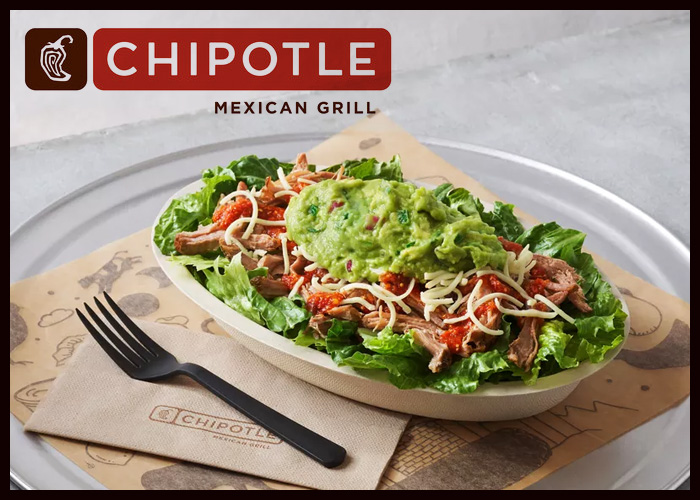

### Data Analysis Project steps
- Create a problem statement.
- Identify the data you wan to analyze.
- Explore and clean the data.
- Analyze the data to get useful insights
- Present the data in terms of reports or dashboards using visualizations.

### Scenario

You are a financial data analyst at Chipotle and your manager has tasked you with analyzing the most recent sales numbers. She has provided the following set of questions she would like answered.

### Challenge Questions

1.  Which was the most-ordered item?
2.  For the most-ordered item, how many items were ordered?
3.  What was the most ordered item in the choice_description column?
4.  How many items were ordered in total?
5.  Turn the item price into a float
6.  How much was the revenue for the period in the dataset?
7.  How many orders were made in the period?
8.  What is the average revenue amount per order?
9.  How many different items are sold?

## 1. Know your Dataset 

### Importing Librabries

In [38]:
import pandas as pd

### Loading the Dataset

In [39]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chiptole = pd.read_csv(url, sep = '\t')
df = chiptole
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### Dataset View

In [40]:
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [41]:
# First 5 rows of the dataset
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [42]:
#Last 5 rows ofthe dataset
df.tail()

,order_id,quantity,item_name,choice_description,item_price
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


### Dataset rows & columns count

In [43]:
df.shape
print('Number of rows:',df.shape[0])
print('Number of columns:',df.shape[1])

Number of rows: 4622
Number of columns: 5


### Dataset information

In [44]:
#Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [45]:
# To check  the null values
df.isnull().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

## 2. Data Wrangling

In [46]:
# creating a duplicate of the original dataset before making any changes in it.
df1 = df.copy()

In [47]:
df1

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


## 3. Challenge Questions

### `1. Which was the most-ordered item?`

In [61]:
order_items = df1.groupby('item_name')['quantity'].sum().idxmax()
print("Most Ordered Item:", order_items)

Most Ordered Item: Chicken Bowl


 - **Chicken Bowl** was the most-ordered item.

### `2. For the most-ordered items, How many items were ordered?`

In [59]:
order_items = df1.groupby('item_name')['quantity'].sum().idxmax()
quantity_ordered = df1.groupby('item_name')['quantity'].sum().max()
print("Most Ordered Item:", order_items)
print("Quantity Ordered:", quantity_ordered)

Most Ordered Item: Chicken Bowl
Quantity Ordered: 761


- The most ordered item was the **Chicken Bowl**, with a total order quantity of **761**.

### `3. what was the most ordered item in the choice_description column?`

In [60]:
most_ordered_choice = df1.groupby('choice_description')['quantity'].sum().idxmax()
print("Most Ordered Item:", most_ordered_choice)

Most Ordered Item: [Diet Coke]


- **Diet Coke** was the most-ordered item in the choice_description column.

### `4. How many items were ordered in total?`

In [62]:
total_items_ordered = df1['quantity'].sum()
print("Total Number of items Ordered: ",total_items_ordered)

Total Number of items Ordered:  4972


- A total of **4972** items were ordered.

### `5. Convert the item price into float`

In [92]:
df1.dtypes
df1['item_price'] = df1['item_price'].astype(float)
df2 = df1['item_price'].dtype
print("The data type for the item_price column: ",df2)

The data type for the item_price column:  float64


- The datatype for item_price is converted from **object** to **float**.

### `6. How much was the revenue for the period in the dataset?`

In [65]:
Revenue = (df1['quantity']*df1['item_price']).sum()
print("The Revenue for the period in the dataset was : $",Revenue)

The Revenue for the period in the dataset was : $ 39237.02


- The total Revenue generated for the period in the dataset is **$39237.02**.

### `7. How many orders were made in a period?`

In [66]:
Number_orders = df1['order_id'].nunique()
print("The Number of Orders: ", Number_orders)

The Number of Orders:  1834


- The Total Number of orders made in a period is **1834**.

### `8. What is the average revenue amount per order?`

In [79]:
avg_revenue  = round(Revenue/Number_orders,2)
print("Average Revenue per order $: ",avg_revenue)

Average Revenue per order $:  21.39


- The Average Revenue generated per order is **$21.39**.

### `9. How many different items were sold?`

In [81]:
Number_items_sold = df1['item_name'].nunique()
print("Number of different items Sold: ",Number_items_sold)

Number of different items Sold:  50


- A total of **50** different items were sold.

## 4. Insights

- The **`Chicken Bowl`** was the most-ordered item, with a total order quantity of **`761`** followed by **`Diet Coke`** being the most-ordered item in the choice_description column.

- A total of **`4,972`** items were ordered, resulting in a substantial volume of sales.

- The item_price data type was successfully converted from **`object`** to **`float`**, allowing for numerical operations and calculations.

- The dataset indicates a total revenue of **`39,237.02`** generated during the specified period.

- The total number of orders made within the period was **`1,834`**, indicating a considerable level of customer activity.

- On average, each order generated approximately **`21.39`** in revenue, reflecting the average spending per customer.

- A diverse range of **`50`** different items were sold, indicating a varied and extensive product offering.